In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Data Analysis and Manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() ## this is for styling



In [2]:
df =pd.read_csv('Train.csv', index_col = 0)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8068 entries, 462809 to 461879
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 693.3+ KB


In [5]:
data = df.drop(["Work_Experience" ,"Spending_Score" , "Var_1" , "Segmentation"], axis = 1)

In [6]:
#we will fill the null values with the mode
data['Ever_Married'] = data['Ever_Married'].fillna(data['Ever_Married'].mode()[0])
data['Graduated'] = data['Graduated'].fillna(data['Graduated'].mode()[0])
data['Profession'] = data['Profession'].fillna(data['Profession'].mode()[0])
data['Family_Size'] = data['Family_Size'].fillna(data['Family_Size'].median())

In [7]:
#we will encode the object
# Convert categorical features to numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encode object columns
for col in ['Gender', 'Ever_Married', 'Graduated', 'Profession']:
    data[col] = encoder.fit_transform(data[col])

# Check the transformed data
print(data.head())

        Gender  Ever_Married  Age  Graduated  Profession  Family_Size
ID                                                                   
462809       1             0   22          0           5          4.0
462643       0             1   38          1           2          3.0
466315       0             1   67          1           2          1.0
461735       1             1   67          1           7          2.0
462669       0             1   40          1           3          6.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8068 entries, 462809 to 461879
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        8068 non-null   int64  
 1   Ever_Married  8068 non-null   int64  
 2   Age           8068 non-null   int64  
 3   Graduated     8068 non-null   int64  
 4   Profession    8068 non-null   int64  
 5   Family_Size   8068 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 441.2 KB


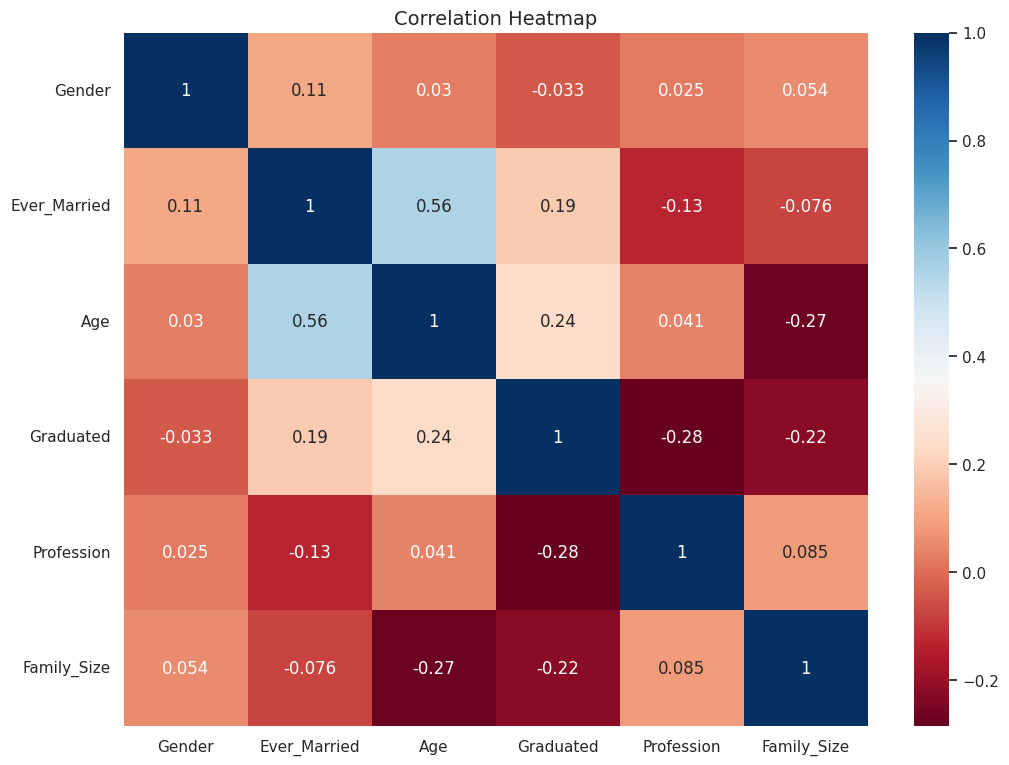

In [9]:
#data preprossingf
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [10]:
## Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(data)

In [32]:
df_std = pd.DataFrame(data = df_std,columns = data.columns)

,Gender,Ever_Married,Age,Graduated,Profession,Family_Size
0,0.909164,-1.206653,-1.284623,-1.29219,0.886607,0.762698
1,-1.099912,0.828738,-0.327151,0.77388,-0.293910,0.095802
2,-1.099912,0.828738,1.408268,0.77388,-0.293910,-1.237990
3,0.909164,0.828738,1.408268,0.77388,1.673618,-0.571094
4,-1.099912,0.828738,-0.207467,0.77388,0.099596,2.096491


In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [13]:
# Assuming you want to keep 2 principal components
pca = PCA(n_components=2)

# Fit PCA to your standardized data
scores_pca = pca.fit_transform(df_std)

**There are two components. Within Clusters Sum of Squares(WCSS) and Elbow Method.**

In [14]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

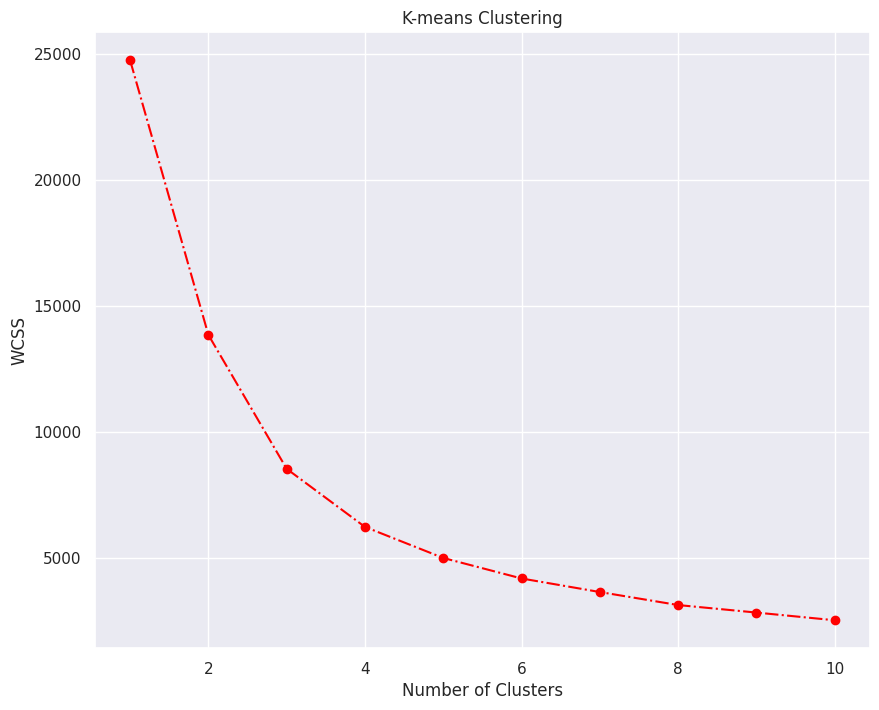

In [15]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [17]:
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [18]:
df_segm_kmeans= df_std.copy()
df_std["Segment K-means"] = kmeans.labels_

In [19]:
df_std.head()

,Gender,Ever_Married,Age,Graduated,Profession,Family_Size,Segment K-means
0,0.909164,-1.206653,-1.284623,-1.29219,0.886607,0.762698,1
1,-1.099912,0.828738,-0.327151,0.77388,-0.293910,0.095802,0
2,-1.099912,0.828738,1.408268,0.77388,-0.293910,-1.237990,0
3,0.909164,0.828738,1.408268,0.77388,1.673618,-0.571094,3
4,-1.099912,0.828738,-0.207467,0.77388,0.099596,2.096491,0


In [20]:
df_segm_analysis = df_std.groupby(['Segment K-means']).mean()
df_segm_analysis

,Gender,Ever_Married,Age,Graduated,Profession,Family_Size
Segment K-means,,,,,,
0,-1.099912,0.097415,0.235260,0.749261,-0.327093,-0.361428
1,-0.048461,-1.172558,-0.994860,-0.865342,0.553226,0.664864
2,0.166100,0.784707,0.484120,-1.292190,0.224815,0.007845
3,0.909164,0.391822,0.303179,0.773880,-0.281231,-0.214413


In [21]:
# Rename the index to meaningful segment names
df_segm_analysis.rename(index={
    0: "Educated Singles",
    1: "Young Large Families",
    2: "Married Mid-Age",
    3: "Educated Couples"
}, inplace=True)
Labels = ['Educated Singles', 'Young Large Families', 'Married Mid-Age', 'Educated Couples']
df_segm_analysis['Labels'] = Labels

# Check updated DataFrame
df_segm_analysis

,Gender,Ever_Married,Age,Graduated,Profession,Family_Size,Labels
Segment K-means,,,,,,,
Educated Singles,-1.099912,0.097415,0.235260,0.749261,-0.327093,-0.361428,Educated Singles
Young Large Families,-0.048461,-1.172558,-0.994860,-0.865342,0.553226,0.664864,Young Large Families
Married Mid-Age,0.166100,0.784707,0.484120,-1.292190,0.224815,0.007845,Married Mid-Age
Educated Couples,0.909164,0.391822,0.303179,0.773880,-0.281231,-0.214413,Educated Couples


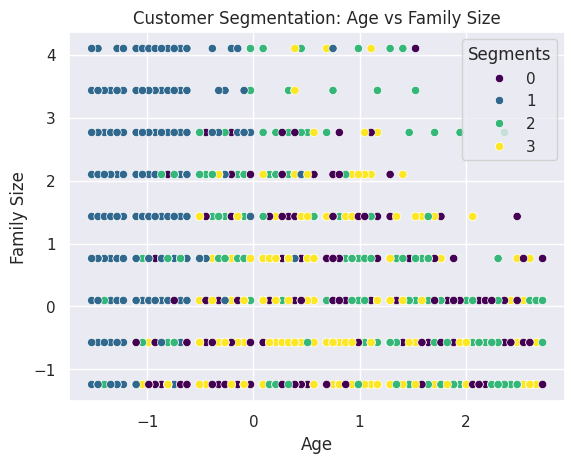

In [22]:
sns.scatterplot(
    data=df_std,
    x="Age",
    y="Family_Size",
    hue="Segment K-means",
    palette="viridis"
)
plt.title("Customer Segmentation: Age vs Family Size")
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.legend(title="Segments")
plt.show()

In [23]:
pca = PCA()
pca.fit(df_std)

PCA()

In [24]:
pca.explained_variance_ratio_

array([0.31730074, 0.2308155 , 0.15274749, 0.12303671, 0.09057833,
       0.04998221, 0.03553903])

We observe that the first component explains around 31 % of the variability of the data. The second one is 23% and so on.

Text(0, 0.5, 'Cumulative Explained Variance')

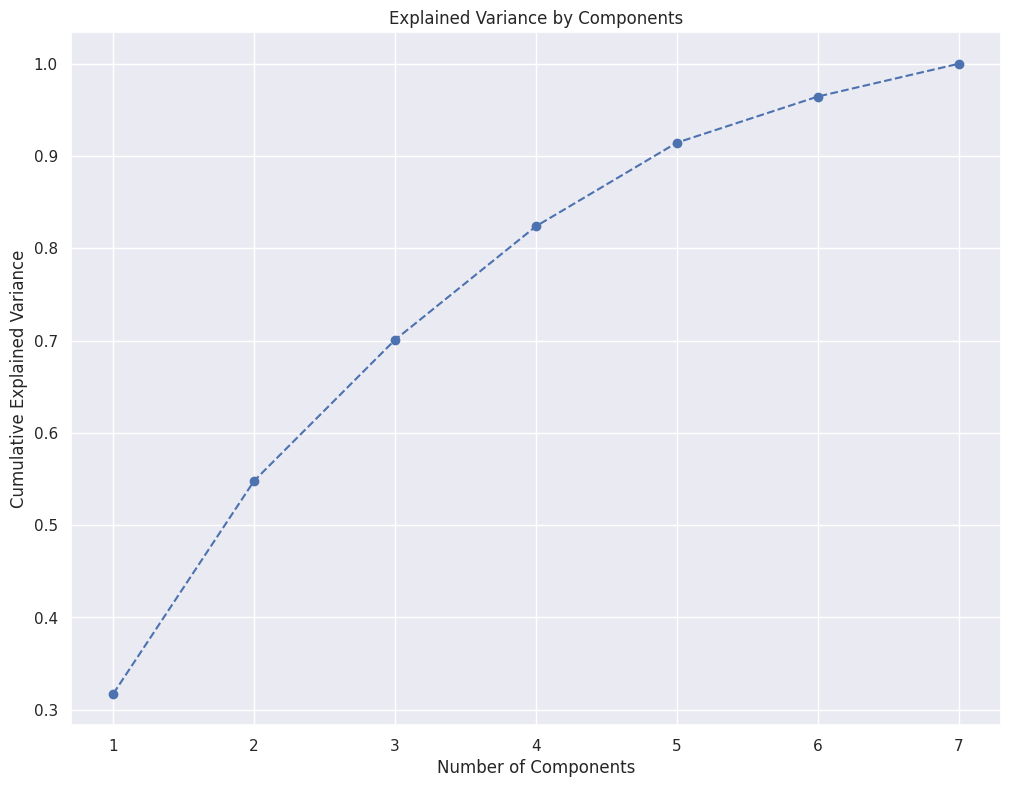

In [25]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [34]:
pca = PCA(n_components = 3)
pca.fit(df_std)
pca.components_

array([[ 0.0430203 ,  0.53770786,  0.57187172,  0.44223218, -0.23437146,
        -0.36260578],
       [ 0.44459287,  0.34611789,  0.34566839, -0.41610588,  0.58133899,
         0.22793383],
       [ 0.64883507,  0.15651859, -0.23300974,  0.13409959, -0.53054488,
         0.44806346]])

The result is a 3 by 7 array. We reduced our futures to three components from the original seven values that explain the shape the values themselves show the so-called loadings.

Hey, just a minute, what is loading then?

Loadings are correlations between an original variable and the component.

For instance, the first value of the array shows the loading of the first feature on the first component.

Let’s put this information in a pandas data frame so that we can see them nicely. Columns are seven original features and rows are three components that PCA gave us.

In [35]:
feature_names = data.columns

In [36]:
# Assuming you want to keep 3 principal components
pca = PCA(n_components=3)

# Fit PCA to your standardized data
scores_pca = pca.fit_transform(df_std) # Fit before accessing components_



In [37]:
data.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Family_Size'],
      dtype='object')

In [39]:
# Now you can access pca.components_

#
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns=data.columns,
                           index=['Component 1', 'Component 2', 'Component 3']
                           )
df_pca_comp

,Gender,Ever_Married,Age,Graduated,Profession,Family_Size
Component 1,0.043020,0.537708,0.571872,0.442232,-0.234371,-0.362606
Component 2,0.444593,0.346118,0.345668,-0.416106,0.581339,0.227934
Component 3,0.648835,0.156519,-0.233010,0.134100,-0.530545,0.448063


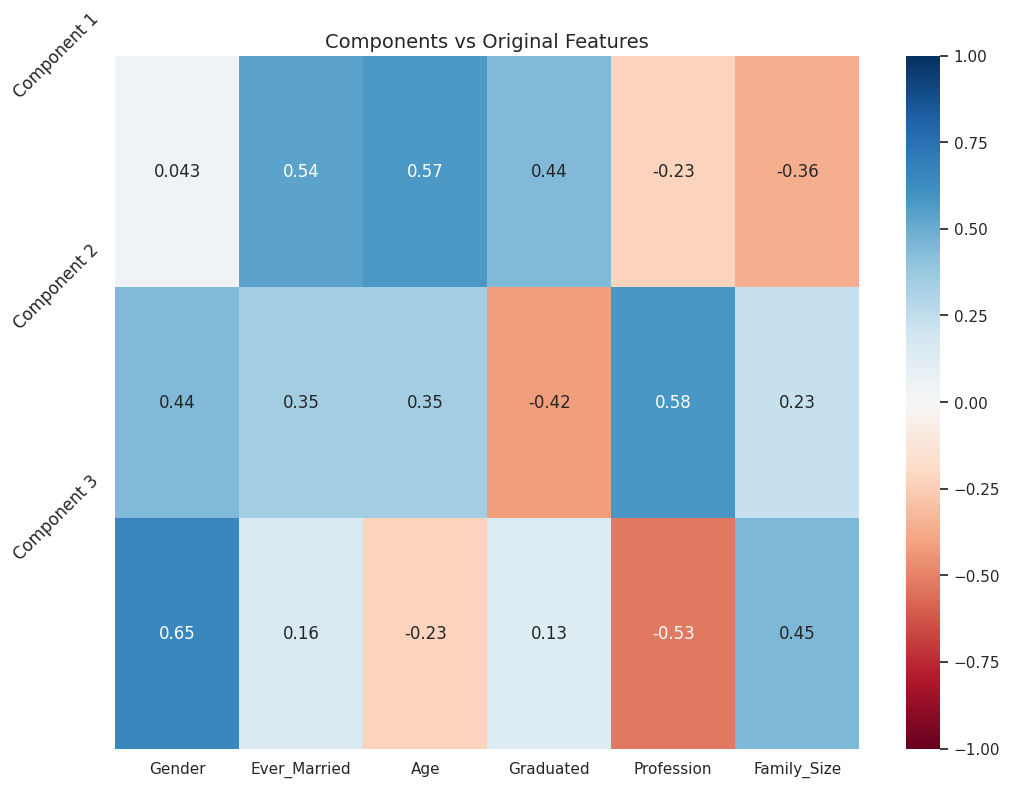

In [40]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

Let's consider a hypothetical example from your heatmap. If 'Age' has a strong positive correlation (dark red) with Component 1 and a weak negative correlation (light blue) with Component 2, we can infer that 'Age' is a significant contributor to Component 1 and has a minor inverse relationship with Component 2.

In summary, the heatmap of df_pca_comp provides insights into the relationships between principal components and original features, aiding in feature selection, component interpretation, and understanding the underlying data structure

 PCA is performed 3 times for different purposes: dimensionality reduction, variance explanation, and component analysis.